In [1]:
# import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from myReadGCMsDaily import read_var_mod
from read_amip import read_amip_var
import calendar
from global_land_mask import globe
import glob
import math
from regrid_wght_3d import regrid_wght_wnans
from scipy import stats
import os
import netCDF4 as nc

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.clf()
plt.rcParams['figure.figsize'] = (10, 10)

<Figure size 600x400 with 0 Axes>

In [15]:
time1=[2010, 1, 1]
time2=[2012, 12, 30]

In [17]:
#latitude range
latr1 = 30
latr2 = 80


In [19]:
l = 0
m = len(amip_md)

In [20]:
lats_edges = np.arange(latr1,latr2+1,5)
lons_edges = np.arange(-180,181,5)

#binning
n_bins  = 20
M_range = (-9,-6)
bin_co  = 1000

b_coun = []

In [20]:
fpath      = glob.glob('/glade/scratch/geethma/cmip6/surface/*sfcWind*_amip_*')

In [21]:
fpath

['/glade/scratch/geethma/cmip6/surface/sfcWind_day_CESM2_amip_r2i1p1f1_gn_20100101-20150101.nc',
 '/glade/scratch/geethma/cmip6/surface/sfcWind_day_IPSL-CM6A-LR_amip_r11i1p1f1_gr_19580101-20141231.nc']

In [26]:
for j in range(0,len(amip_md)):
    print(amip_md[j])
    for i in varname:
        print(i,'hist')
        locals()['hist_'+i+'__'+str(j+1)] = read_amip_var('surface', amip_md[j], '_amip_', i, time1, time2)
        print(i,'warm')
        locals()['warm_'+i+'__'+str(j+1)] = read_var_mod('surface', amip_md[j], 'amip-p4K', i, time1, time2)

    for k in pvarname:
        print(k,'hist')
        locals()['hist_'+k+'__'+str(j+1)] = read_amip_var('p_level', amip_md[j], '_amip_', k, time1, time2)
        print(k,'warm')
        locals()['warm_'+k+'__'+str(j+1)] = read_var_mod('p_level', amip_md[j], 'amip-p4K', k, time1, time2)
        

CESM2
sfcWind hist


/glade/work/geethma/research/codes/read_amip.py:69: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  data.extend(np.array(datai[ind1:ind2+1,:,:]))


sfcWind warm


/glade/work/geethma/research/codes/myReadGCMsDaily.py:69: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  data.extend(np.array(datai[ind1:ind2+1,:,:]))


tas hist
tas warm
psl hist
psl warm
ta hist
ta warm
IPSL-CM6A-LR
sfcWind hist
sfcWind warm
tas hist
tas warm
psl hist
psl warm
ta hist
ta warm


In [27]:
M_hist = []
W_hist = []
bin_count = 1000

for i in range(0,len(amip_md)):
    print(amip_md[i])
    for j in varname:
        lat  = locals()['hist_'+j+'__'+str(i+1)][0]
        lon  = locals()['hist_'+j+'__'+str(i+1)][1]
        time = locals()['hist_'+j+'__'+str(i+1)][2]

        x_lat = np.array(lat)
        lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr1)).argmin()])[0]
        lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr2)).argmin()])[0]
        lats = lat[lat_ind1[0]:lat_ind2[0]]

        x_lon = lon
        lon = np.array(lon)
        lon[lon > 180] = lon[lon > 180]-360

        maskm = np.ones((len(time),len(lats),len(lon)))

        for a in range(len(lats)):
            for b in range(len(lon)):
                if globe.is_land(lats[a], lon[b])==True:
                    maskm[:,a,b] = math.nan
        #print(j)
        locals()[j+str(i+1)] = locals()['hist_'+j+'__'+str(i+1)][4]
        locals()[j+str(i+1)] = np.ma.filled(locals()[j+str(i+1)], fill_value=np.nan)
        locals()['plot_'+j+str(i+1)] = np.array(np.multiply(maskm,locals()[j+str(i+1)][:,lat_ind1[0]:lat_ind2[0],:]))
        locals()['grid_'+j+str(i+1)] = regrid_wght_wnans(lats,lon,locals()['plot_'+j+str(i+1)],lats_edges,lons_edges)[0]

    for k in pvarname:
        #print(k)
        lat  = locals()['hist_'+k+'__'+str(i+1)][0]
        lon  = locals()['hist_'+k+'__'+str(i+1)][1]
        time = locals()['hist_'+k+'__'+str(i+1)][2]

        x_lat = np.array(lat)
        lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr1)).argmin()])[0]
        lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr2)).argmin()])[0]
        lats = lat[lat_ind1[0]:lat_ind2[0]]

        x_lon = lon
        lon = np.array(lon)
        lon[lon > 180] = lon[lon > 180]-360

        maskm = np.ones((len(time),len(lats),len(lon)))

        for a in range(len(lats)):
            for b in range(len(lon)):
                if globe.is_land(lats[a], lon[b])==True:
                    maskm[:,a,b] = math.nan
        locals()['plot_levels'+str(i+1)] = locals()['hist_ta__'+str(i+1)][3]
        locals()['grid_'+k+str(i+1)] = []

        levels = locals()['plot_levels'+str(i+1)]

        for p in range(len(levels)):
            if levels[p] == 70000:
                #print(levels[p])
                locals()[k+str(i+1)] = locals()['hist_'+k+'__'+str(i+1)][4]
                locals()[k+str(i+1)] = np.ma.filled(locals()[k+str(i+1)], fill_value=np.nan)
                temp_700   = np.array(np.multiply(maskm,locals()[k+str(i+1)][:,p,lat_ind1[0]:lat_ind2[0],:]))
                grid_t_700 = regrid_wght_wnans(lats,lon,temp_700,lats_edges,lons_edges)[0]
                break;

    theta_700 = grid_t_700*(100000/70000)**con
    theta_t2m = locals()['grid_tas'+str(i+1)]*(100000/locals()['grid_psl'+str(i+1)])**con

    t = min(len(theta_t2m),len(theta_700))
    M_700  = theta_t2m[0:t,:,:] - theta_700[0:t,:,:]
    plot_M = M_700.flatten()
    try_W  = locals()['grid_sfcWind'+str(i+1)][0:t,:,:]
    plot_W = try_W.flatten()

    ind = np.argsort(plot_M)

    final_M = np.sort(plot_M)
    final_W = plot_W[ind]

    indx = np.isnan(final_M*final_W)==False

    bin_means, bin_edges, binnumber       = stats.binned_statistic(final_M[indx], final_W[indx], 'mean', bins=n_bins,range=M_range)
    bin_means_c, bin_edges_c, binnumber_c = stats.binned_statistic(final_M[indx], final_W[indx], 'count', bins=n_bins,range=M_range)
    bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(final_M[indx], final_M[indx], 'mean', bins=n_bins,range=M_range)

    ind_c = np.where(bin_means_c > bin_co)

    M_hist.append(np.ma.masked_invalid(bin_means_x[ind_c])) #[ind_c]
    W_hist.append(np.ma.masked_invalid(bin_means[ind_c]))
    bin_count = min(bin_count,len(bin_means_c[ind_c]))
print('HISTORICAL DONE')
    

CESM2


/glade/work/geethma/research/codes/regrid_wght_3d.py:46: RuntimeWarning: invalid value encountered in true_divide
  zout[i]=zz[0]/ww[0]


IPSL-CM6A-LR


In [28]:
W_warm = []
M_warm = []

for i in range(0,len(amip_md)):
    print(amip_md[i])
    for j in varname:
        lat  = locals()['warm_'+j+'__'+str(i+1)][0]
        lon  = locals()['warm_'+j+'__'+str(i+1)][1]
        time = locals()['warm_'+j+'__'+str(i+1)][2]

        x_lat = np.array(lat)
        lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr1)).argmin()])[0]
        lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr2)).argmin()])[0]
        lats = lat[lat_ind1[0]:lat_ind2[0]]

        x_lon = lon
        lon = np.array(lon)
        lon[lon > 180] = lon[lon > 180]-360

        maskm = np.ones((len(time),len(lats),len(lon)))

        for a in range(len(lats)):
            for b in range(len(lon)):
                if globe.is_land(lats[a], lon[b])==True:
                    maskm[:,a,b] = math.nan
        print(j)
        locals()[j+str(i+1)] = locals()['warm_'+j+'__'+str(i+1)][4]
        locals()[j+str(i+1)] = np.ma.filled(locals()[j+str(i+1)], fill_value=np.nan)
        locals()['plot_'+j+str(i+1)] = np.array(np.multiply(maskm,locals()[j+str(i+1)][:,lat_ind1[0]:lat_ind2[0],:]))
        locals()['grid_'+j+str(i+1)] = regrid_wght_wnans(lats,lon,locals()['plot_'+j+str(i+1)],lats_edges,lons_edges)[0]

    for k in pvarname:
        print(k)
        lat  = locals()['warm_'+k+'__'+str(i+1)][0]
        lon  = locals()['warm_'+k+'__'+str(i+1)][1]
        time = locals()['warm_'+k+'__'+str(i+1)][2]

        x_lat = np.array(lat)
        lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr1)).argmin()])[0]
        lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr2)).argmin()])[0]
        lats = lat[lat_ind1[0]:lat_ind2[0]]

        x_lon = lon
        lon = np.array(lon)
        lon[lon > 180] = lon[lon > 180]-360

        maskm = np.ones((len(time),len(lats),len(lon)))

        for a in range(len(lats)):
            for b in range(len(lon)):
                if globe.is_land(lats[a], lon[b])==True:
                    maskm[:,a,b] = math.nan
        locals()['plot_levels'+str(i+1)] = locals()['warm_ta__'+str(i+1)][3]
        locals()['grid_'+k+str(i+1)] = []

        levels = locals()['plot_levels'+str(i+1)]

        for p in range(len(levels)):
            if levels[p] == 70000:
                print(levels[p])
                locals()[k+str(i+1)] = locals()['warm_'+k+'__'+str(i+1)][4]
                locals()[k+str(i+1)] = np.ma.filled(locals()[k+str(i+1)], fill_value=np.nan)
                temp_700   = np.array(np.multiply(maskm,locals()[k+str(i+1)][:,p,lat_ind1[0]:lat_ind2[0],:]))
                grid_t_700 = regrid_wght_wnans(lats,lon,temp_700,lats_edges,lons_edges)[0]
                break;

    theta_700 = grid_t_700*(100000/70000)**con
    theta_t2m = locals()['grid_tas'+str(i+1)]*(100000/locals()['grid_psl'+str(i+1)])**con

    t = min(len(theta_t2m),len(theta_700))
    M_700  = theta_t2m[0:t,:,:] - theta_700[0:t,:,:]
    plot_M = M_700.flatten()
    try_W  = locals()['grid_sfcWind'+str(i+1)][0:t,:,:]
    plot_W = try_W.flatten()

    ind = np.argsort(plot_M)

    final_M = np.sort(plot_M)
    final_W = plot_W[ind]

    indx = np.isnan(final_M*final_W)==False

    bin_means, bin_edges, binnumber       = stats.binned_statistic(final_M[indx], final_W[indx], 'mean', bins=n_bins,range=M_range)
    bin_means_c, bin_edges_c, binnumber_c = stats.binned_statistic(final_M[indx], final_W[indx], 'count', bins=n_bins,range=M_range)
    bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(final_M[indx], final_M[indx], 'mean', bins=n_bins,range=M_range)

    ind_c = np.where(bin_means_c > bin_co)

    M_warm.append(np.ma.masked_invalid(bin_means_x[ind_c])) #[ind_c]
    W_warm.append(np.ma.masked_invalid(bin_means[ind_c]))
    bin_count = min(bin_count,len(bin_means_c[ind_c]))
print('WARMING DONE')

CESM2
IPSL-CM6A-LR


In [ ]:
s = 15

for i in range(len(amip_md)):
    plt.scatter(W_hist[i][0:bin_count], W_warm[i][0:bin_count], label=amip_md[i], color=use_colors[i+len(modname)],s=s,marker="_")
    x = np.sort(W_hist[i])[bin_count-1]-0.2
    y = np.sort(W_warm[i])[bin_count-1]+0.03
    plt.annotate(xy=(x,y), text=amip_md[i]+'\n :amip', color=use_colors[i+len(modname)],fontsize=9)
    # print(i)

# plt.ylabel('Warming U10 [m/s]')
# plt.plot([7,10],[7,10],'k--')
# plt.annotate(xy=(10,10), text='1-1', color='black',fontsize=7)
# # plt.xlim(-20,0)
# yti = '700'
# plt.xlabel('Historical U10 [m/s]')
# plt.title('U10 comparison for historical and warming scenarios\nin cold air outbreaks')
plt.savefig('../figures/abrupt_amip_warmingVShistorical.png')

0
1


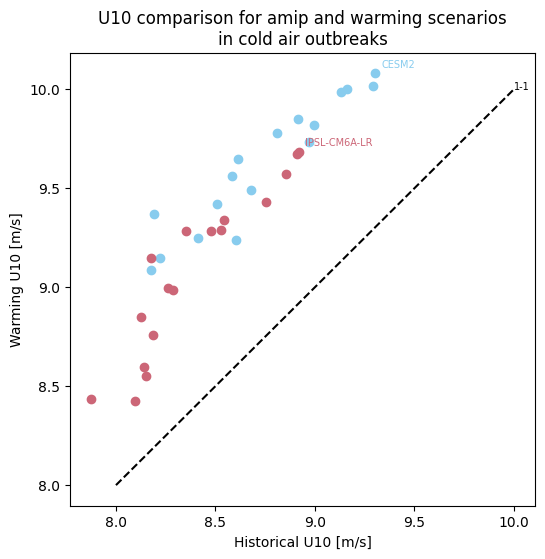

In [32]:
for i in range(len(warming_modname)):
    plt.scatter(W_hist[i][0:bin_count], W_warm[i][0:bin_count], label=warming_modname[i], color=use_colors[i])
    plt.annotate(xy=(W_hist[i][bin_count-1]+0.03, W_warm[i][bin_count-1]+0.03), text=warming_modname[i], color=use_colors[i],fontsize=7)
    print(i)
    
plt.ylabel('Warming U10 [m/s]')
plt.plot([8,10],[8,10],'k--')
plt.annotate(xy=(10,10), text='1-1', color='black',fontsize=7)
# plt.xlim(-20,0)
yti = '700'
plt.xlabel('Historical U10 [m/s]')
plt.title('U10 comparison for amip and warming scenarios\nin cold air outbreaks')
plt.savefig('../figures/amipp4kVSamip.png')
plt.show()

0
1


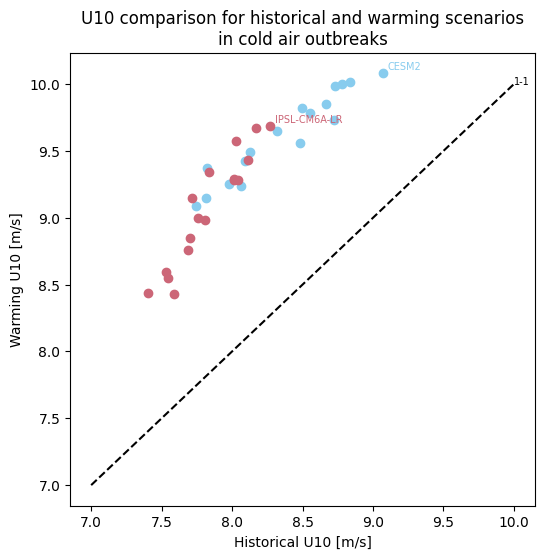

In [34]:

for i in range(len(warming_modname)):
    plt.scatter(W_hist[i][0:bin_count], W_warm[i][0:bin_count], label=warming_modname[i], color=use_colors[i])
    plt.annotate(xy=(W_hist[i][bin_count-1]+0.03, W_warm[i][bin_count-1]+0.03), text=warming_modname[i], color=use_colors[i],fontsize=7)
    print(i)
    
plt.ylabel('Warming U10 [m/s]')
plt.plot([7,10],[7,10],'k--')
plt.annotate(xy=(10,10), text='1-1', color='black',fontsize=7)
# plt.xlim(-20,0)
yti = '700'
plt.xlabel('Historical U10 [m/s]')
plt.title('U10 comparison for historical and warming scenarios\nin cold air outbreaks')
plt.savefig('../figures/amipp4kVShistorical.png')
plt.show()